# 1. Segment users based on their browsing activity.

### INFERENCE:

The Users are segmented based on their browsing activities. From the dataset given, 
User_Id and Action_type are the two features which are related to the USER and his Browsing Activities.
Users are classified by the following actions:
'view',
'add_to_cart',
'remove_from_cart',
'add_to_wishlist',
'place_order',
'remove_from_wishlist',
'register'

out of those the number of users who just viewed the page are more. 
The count is so high as comapre to other class.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import k_means
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns',18)

In [3]:
df = pd.read_csv('Event Data.csv',low_memory=False)

In [8]:
df.shape

(801810, 18)

In [9]:
df.info

<bound method DataFrame.info of        action_type user_type                    epoch  \
0             view     guest  2019-11-28 20:59:00.000   
1             view     guest  2019-11-28 20:59:00.000   
2             view     guest  2019-11-28 20:59:01.000   
3             view     guest  2019-11-28 20:59:01.000   
4             view     guest  2019-11-28 20:59:01.000   
...            ...       ...                      ...   
801805        view     guest  2019-11-29 15:00:16.000   
801806        view     guest  2019-11-29 15:00:16.000   
801807        view     guest  2019-11-29 15:00:16.000   
801808        view     guest  2019-11-29 15:00:17.000   
801809        view     guest  2019-11-29 15:00:17.000   

                                                object_id user_id       sid  \
0       Buy Engagement Rings Online - Shop Diamond Eng...     NaN  0.693364   
1                                          500064ONAABB09     NaN  0.472003   
2       Buy Diamond Earrings Online in India |

In [10]:
df.describe

<bound method NDFrame.describe of        action_type user_type                    epoch  \
0             view     guest  2019-11-28 20:59:00.000   
1             view     guest  2019-11-28 20:59:00.000   
2             view     guest  2019-11-28 20:59:01.000   
3             view     guest  2019-11-28 20:59:01.000   
4             view     guest  2019-11-28 20:59:01.000   
...            ...       ...                      ...   
801805        view     guest  2019-11-29 15:00:16.000   
801806        view     guest  2019-11-29 15:00:16.000   
801807        view     guest  2019-11-29 15:00:16.000   
801808        view     guest  2019-11-29 15:00:17.000   
801809        view     guest  2019-11-29 15:00:17.000   

                                                object_id user_id       sid  \
0       Buy Engagement Rings Online - Shop Diamond Eng...     NaN  0.693364   
1                                          500064ONAABB09     NaN  0.472003   
2       Buy Diamond Earrings Online in India

In [4]:
df.head(4)

,action_type,user_type,epoch,object_id,user_id,sid,og_url,tt_id,sub_account,utm_source,utm_campaign,utm_medium,referrer,utm_content,latitude,longitude,useragent,variant_id
0,view,guest,2019-11-28 20:59:00.000,Buy Engagement Rings Online - Shop Diamond Eng...,NaN,0.693364,https://www.tanishq.co.in/shop/engagement-ring...,1574974426476,tanishq,NaN,NaN,NaN,NaN,NaN,26.9167,75.8167,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN
1,view,guest,2019-11-28 20:59:00.000,500064ONAABB09,NaN,0.472003,https://www.tanishq.co.in/product/tanishq-18kt...,1574973022537,tanishq,NaN,NaN,NaN,NaN,NaN,13.0843,80.2805,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3IH000030
2,view,guest,2019-11-28 20:59:01.000,Buy Diamond Earrings Online in India | Shop La...,NaN,0.897467,https://www.tanishq.co.in/shop/diamond-earring...,1574974640117,tanishq,NaN,NaN,NaN,NaN,NaN,38.9841,-77.3672,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 like...,NaN
3,view,guest,2019-11-28 20:59:01.000,511250PGUAAA00,NaN,0.403961,https://www.tanishq.co.in/product/tanishq-22kt...,1564659331282,tanishq,NaN,Sok_Traffic_MultipleAds_Prospecting_Tanishq_No...,cpc,m.facebook.com,NaN,26.9167,75.8167,Mozilla/5.0 (Linux; Android 8.1.0; Redmi Note ...,2ED000494


In [5]:
df['user_id'].notnull().sum()

6299

In [6]:
df['tt_id'].notnull().sum()

801810

In [7]:
df['tt_id'].isnull().sum()

0

In [12]:
df.isna().sum()

action_type          0
user_type            0
epoch                0
object_id           17
user_id         795511
sid                  0
og_url               0
tt_id                0
sub_account          0
utm_source      763136
utm_campaign    608639
utm_medium      608639
referrer        441725
utm_content     797840
latitude             0
longitude            0
useragent            1
variant_id      474166
dtype: int64

In [13]:
len(df.columns)

18

### Browsing activity of the user is specified by the feature 'action_type'. While user is surfing for any purpose, 
### what actions/activities he has performed like 'view' or 'add to cart' or 'place order' etc.
### so to segment users based on activities, we have to focus on 'action_type'

In [20]:
print('Action Type Count: ',df.action_type.notnull().count())
print('Number of Records in Dataset: ', len(df))

Action Type Count:  801810
Number of Records in Dataset:  801810


### The feature 'action_type' has null value count equals to zero. it means it is the best verticle to identify the user class 

In [15]:
df.groupby('action_type').get_group('view')

,action_type,user_type,epoch,object_id,user_id,sid,og_url,tt_id,sub_account,utm_source,utm_campaign,utm_medium,referrer,utm_content,latitude,longitude,useragent,variant_id
0,view,guest,2019-11-28 20:59:00.000,Buy Engagement Rings Online - Shop Diamond Eng...,NaN,0.693364,https://www.tanishq.co.in/shop/engagement-ring...,1574974426476,tanishq,NaN,NaN,NaN,NaN,NaN,26.9167,75.8167,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN
1,view,guest,2019-11-28 20:59:00.000,500064ONAABB09,NaN,0.472003,https://www.tanishq.co.in/product/tanishq-18kt...,1574973022537,tanishq,NaN,NaN,NaN,NaN,NaN,13.0843,80.2805,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3IH000030
2,view,guest,2019-11-28 20:59:01.000,Buy Diamond Earrings Online in India | Shop La...,NaN,0.897467,https://www.tanishq.co.in/shop/diamond-earring...,1574974640117,tanishq,NaN,NaN,NaN,NaN,NaN,38.9841,-77.3672,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 like...,NaN
3,view,guest,2019-11-28 20:59:01.000,511250PGUAAA00,NaN,0.403961,https://www.tanishq.co.in/product/tanishq-22kt...,1564659331282,tanishq,NaN,Sok_Traffic_MultipleAds_Prospecting_Tanishq_No...,cpc,m.facebook.com,NaN,26.9167,75.8167,Mozilla/5.0 (Linux; Android 8.1.0; Redmi Note ...,2ED000494
4,view,guest,2019-11-28 20:59:01.000,502112FHHLAJ54,NaN,0.961382,https://www.tanishq.co.in/product/tanishq-18kt...,1574974721184,tanishq,NaN,NaN,NaN,NaN,NaN,32.1000,76.2667,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_2 like...,3IH000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801805,view,guest,2019-11-29 15:00:16.000,512016DDUABAP1,NaN,0.076024,https://www.tanishq.co.in/product/tanishq-22kt...,1561834585014,tanishq,NaN,NaN,NaN,NaN,NaN,18.5332,73.8626,Mozilla/5.0 (Linux; Android 8.1.0; CPH1803) Ap...,2EA000623
801806,view,guest,2019-11-29 15:00:16.000,Buy Gold,NaN,0.377371,https://www.tanishq.co.in/shop/jewellery/price...,1575039554454,tanishq,NaN,NaN,NaN,NaN,NaN,16.9917,78.3437,Mozilla/5.0 (iPhone; CPU iPhone OS 13_2_2 like...,NaN
801807,view,guest,2019-11-29 15:00:16.000,Buy Platinium Jewellery Online | Latest Platin...,NaN,0.992085,https://www.tanishq.co.in/shop/platinum?page=2,1575039308672,tanishq,NaN,NaN,NaN,NaN,NaN,28.4666,77.0309,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15) ...,NaN
801808,view,guest,2019-11-29 15:00:17.000,Gold Chains: Buy Gold Chains Online in India |...,NaN,0.189184,https://www.tanishq.co.in/shop/gold-chains?sor...,1570540154949,tanishq,NaN,NaN,NaN,NaN,NaN,9.9819,76.2845,Mozilla/5.0 (Linux; Android 8.0.0; moto e5 plu...,NaN


In [16]:
df.groupby('action_type').get_group('view')['tt_id'].count()

796899

In [22]:
# df.action_type.unique()
activity = list(df['action_type'].unique())
activity

['view',
 'add_to_cart',
 'remove_from_cart',
 'add_to_wishlist',
 'place_order',
 'remove_from_wishlist',
 'register']

In [23]:
list_action_type = []
list_count = []

for i in activity:
    list_action_type.append(i)
    list_count.append(df.groupby('action_type').get_group(i)['tt_id'].count())

In [24]:
list_action_type,list_count

(['view',
  'add_to_cart',
  'remove_from_cart',
  'add_to_wishlist',
  'place_order',
  'remove_from_wishlist',
  'register'],
 [796899, 4045, 395, 208, 136, 17, 110])

In [25]:
df_seg = pd.DataFrame({'Activity': list_action_type,'Activity_Count':list_count})
df_seg

,Activity,Activity_Count
0,view,796899
1,add_to_cart,4045
2,remove_from_cart,395
3,add_to_wishlist,208
4,place_order,136
5,remove_from_wishlist,17
6,register,110


##### The users who just VIEWED the page has more count than other acticities. And Data is completely Unbalanced. 
#### The Largest Value is 796899 whereas the Second highest value is just 4045. The difference is huge. 
#### In that case the graphical representation seems weird. Other activities bar is even not visible as compared to VIEW bar.  

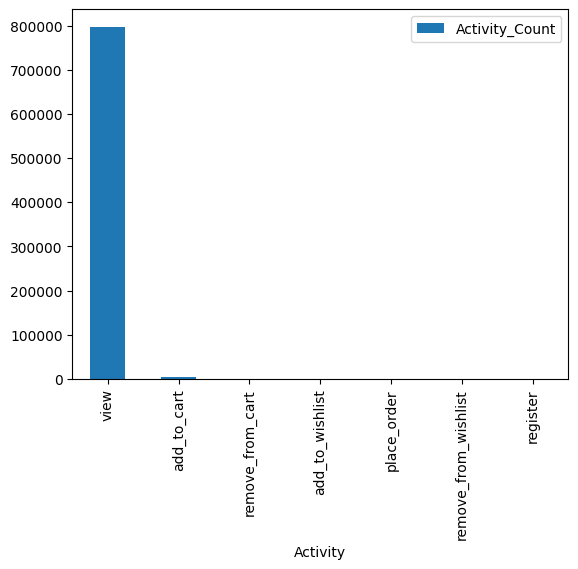

In [27]:
df_seg.plot(kind='bar',x='Activity',y='Activity_Count');

### To tackle this, standard scaling is needed.

In [28]:
stdscale = preprocessing.StandardScaler()
scaled_act = stdscale.fit_transform(df_seg[['Activity_Count']])
df_seg['standardscale'] =  scaled_act
df_seg

,Activity,Activity_Count,standardscale
0,view,796899,2.449461
1,add_to_cart,4045,-0.396661
2,remove_from_cart,395,-0.409764
3,add_to_wishlist,208,-0.410435
4,place_order,136,-0.410694
5,remove_from_wishlist,17,-0.411121
6,register,110,-0.410787


<Figure size 5000x1000 with 0 Axes>

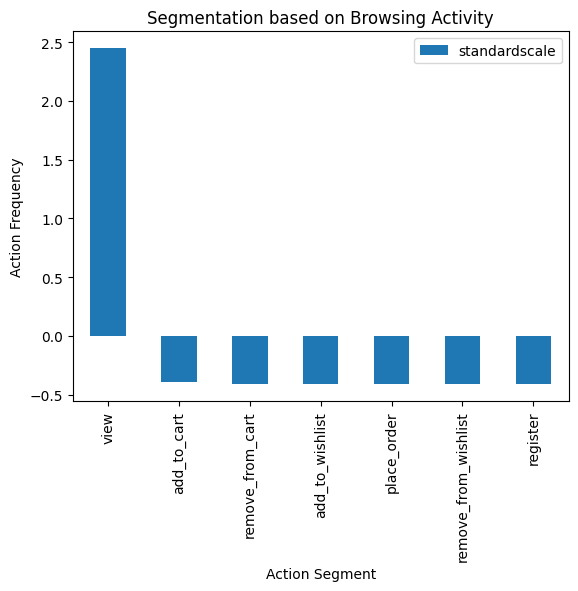

In [34]:
plt.figure(figsize=[50,10])
df_seg.plot(kind='bar',x='Activity',y='standardscale');
plt.xlabel('Action Segment')
plt.ylabel('Action Frequency')
plt.title('Segmentation based on Browsing Activity')
plt.savefig('BarPlot')

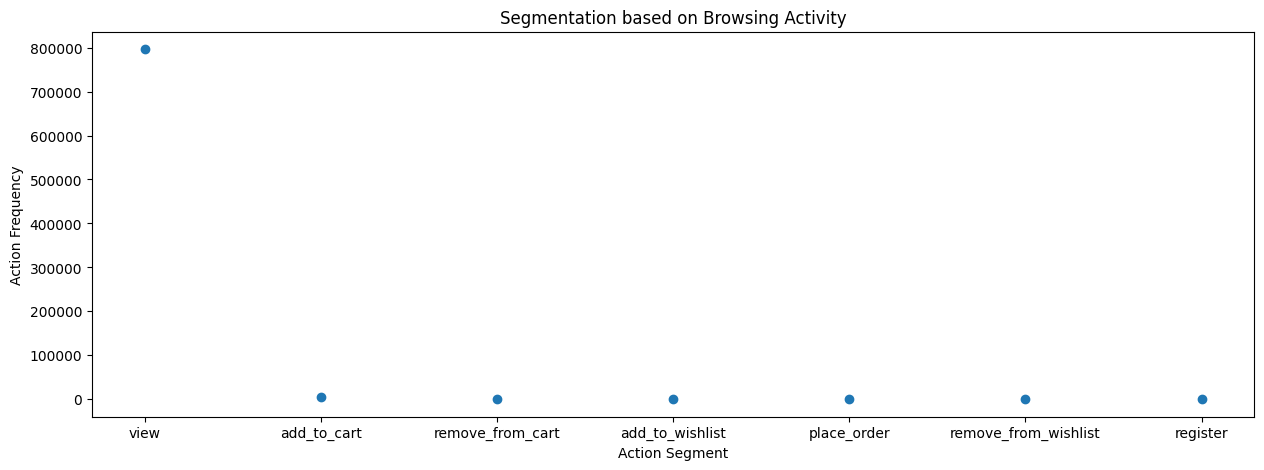

In [37]:
plt.figure(figsize=[15,5])
plt.scatter(df_seg.Activity,df_seg.Activity_Count);
plt.xlabel('Action Segment')
plt.ylabel('Action Frequency')
plt.title('Segmentation based on Browsing Activity')
plt.savefig('Scatter')